# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [60]:
%pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

Note: you may need to restart the kernel to use updated packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


In [61]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# import eli5
# from eli5.sklearn import PermutationImportance

## 2. Data Load

#### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [62]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = './train.csv'
test_path  = './test.csv'
xy_path = './outputFinal.csv'
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
xy = pd.read_csv(xy_path)

In [63]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
train.shape, test.shape, xy.shape

((1118822, 52), (9272, 51), (1128094, 6))

In [64]:
# TrainÍ≥º Test dataÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
pd.set_option('display.max_columns', None) 
display(train.head(1))
display(test.head(1))      # Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä(=Target) columnÏù¥ Ï†úÏô∏Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -                ÏïÑÌååÌä∏  025776611  025776673   

   Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  \
0         NaN           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§   

  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
0    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0    22637.0   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º k-ÌôàÌéòÏù¥ÏßÄ  \
0                20.0                   250.0           0.0       NaN    NaN   

                  k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  \
0  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ   

  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  202307   26  5  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN         ÏßÅÍ±∞Îûò      -                ÏïÑÌååÌä∏  025776611  025776673   

   Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  \
0         NaN           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§   

  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
0    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0    22637.0   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º k-ÌôàÌéòÏù¥ÏßÄ  \
0                20.0                   250.0           0.0       NaN    NaN   

                  k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  \
0  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ   

  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0

## 3. Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [65]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
train['is_test'] = 0
test['is_test'] = 1
concat = pd.concat([train, test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [66]:
concat.shape

(1128094, 53)

In [67]:
xy_renamed = xy.rename(columns={
    'Ï¢åÌëúX': 'Ï¢åÌëúX_1',
    'Ï¢åÌëúY': 'Ï¢åÌëúY_1', 
    'ÏãúÍµ∞Íµ¨': 'ÏãúÍµ∞Íµ¨_1',
    'Î≤àÏßÄ': 'Î≤àÏßÄ_1',
    'ÎèÑÎ°úÎ™Ö': 'ÎèÑÎ°úÎ™Ö_1',
    'Ï£ºÏÜå': 'Ï£ºÏÜå_1'
})

In [68]:
concat.head(1)
# xy_renamed.head(1)

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   

     ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)     k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  \
0  Ïñ∏Ï£ºÎ°ú 3      NaN           -      -                ÏïÑÌååÌä∏  025776611  025776673   

   Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)  \
0         NaN           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©     8.0    270.0       Ïö∞ÏÑ±Í±¥ÏÑ§   

  k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº    k-Ïó∞Î©¥Ï†Å  k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å  k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å  \
0    Î™®Î¶Ñ  1987-11-21 00:00:00.0  22637.0   20204.0    22637.0   

   k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)  k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)  k-85„é°~135„é°Ïù¥Ìïò  k-135„é°Ï¥àÍ≥º k-ÌôàÌéòÏù¥ÏßÄ  \
0                20.0                   250.0           0.0       NaN    NaN   

                  k-Îì±Î°ùÏùºÏûê                 k-ÏàòÏ†ïÏùºÏûê Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏ Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  \
0  2022-11-09 20:10:43.0  2023-09-23 17:21:41.0      NaN      ÏßÅÏòÅ     Îã®ÏùºÍ≥ÑÏïΩ   

  Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  is_test  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000.0        0

In [69]:
# 1. Ïù∏Îç±Ïä§ Î¶¨ÏÖã. 
concat = concat.reset_index(drop=True)  
xy_renamed = xy_renamed.reset_index(drop=True)

# 2. Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï©
concat_xy = pd.concat([concat, xy_renamed], axis=1)

# 3. Í≤∞Í≥º ÌôïÏù∏
print("Î≥ëÌï© Í≤∞Í≥º shape:", concat_xy.shape)

Î≥ëÌï© Í≤∞Í≥º shape: (1128094, 59)


In [70]:
concat_xy.iloc[2000:2100]

ÏãúÍµ∞Íµ¨      Î≤àÏßÄ     Î≥∏Î≤à    Î∂ÄÎ≤à     ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº   Ï∏µ  \
2000  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎèÑÍ≥°Îèô     955  955.0   0.0    ÎèÑÍ≥°Í∑∏Î¶∞Îπå    48.48  201711   25   2   
2001  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎèÑÍ≥°Îèô     955  955.0   0.0    ÎèÑÍ≥°Í∑∏Î¶∞Îπå    48.48  201807   14   2   
2002  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎèÑÍ≥°Îèô  957-11  957.0  11.0  ÎèÑÍ≥°Ïä§ÌÉÄÌÅ¥ÎûòÏä§   111.38  201710   23   6   
2003  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎèÑÍ≥°Îèô  957-11  957.0  11.0  ÎèÑÍ≥°Ïä§ÌÉÄÌÅ¥ÎûòÏä§   112.75  201711   12   5   
2004  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÎèÑÍ≥°Îèô  957-11  957.0  11.0  ÎèÑÍ≥°Ïä§ÌÉÄÌÅ¥ÎûòÏä§   112.75  201711   18  16   
...             ...     ...    ...   ...      ...      ...     ...  ...  ..   
2095  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÑ∏Í≥°Îèô     525  525.0   0.0  Í∞ïÎÇ®Îç∞ÏãúÏïôÌååÌÅ¨   114.69  201801    3   5   
2096  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÑ∏Í≥°Îèô     525  525.0   0.0  Í∞ïÎÇ®Îç∞ÏãúÏïôÌååÌÅ¨    84.95  201801    4  10   
2097  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÑ∏Í≥°Îèô     525  525.0   0.0  Í∞ïÎÇ®Îç∞ÏãúÏïôÌååÌÅ¨   114.69  201801    6   8   
2098  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÑ∏Í≥°Îèô     525  525.0   0.0  Í∞ïÎÇ®Îç∞ÏãúÏïôÌååÌÅ¨    84.95  201801   11   5   
2099  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÑ∏Í≥°Îèô     525  525.0   0.0  Í∞ïÎÇ®Îç∞ÏãúÏïôÌååÌÅ¨   114.69  201801   13   8   

      Í±¥Ï∂ïÎÖÑÎèÑ         ÎèÑÎ°úÎ™Ö  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê Í±∞ÎûòÏú†Ìòï Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
2000  1995  Í∞ïÎÇ®ÎåÄÎ°ú44Í∏∏ 24      NaN           -      -                NaN   
2001  1995  Í∞ïÎÇ®ÎåÄÎ°ú44Í∏∏ 24      NaN           -      -                NaN   
2002  2007  ÎÇ®Î∂ÄÏàúÌôòÎ°ú 2615      NaN           -      -                NaN   
2003  2007  ÎÇ®Î∂ÄÏàúÌôòÎ°ú 2615      NaN           -      -                NaN   
2004  2007  ÎÇ®Î∂ÄÏàúÌôòÎ°ú 2615      NaN           -      -                NaN   
...    ...         ...      ...    ...  ...    ...                ...   
2095  2011  ÌóåÎ¶âÎ°ú590Í∏∏ 63      NaN           -      -                ÏïÑÌååÌä∏   
2096  2011  ÌóåÎ¶âÎ°ú590Í∏∏ 63      NaN           -      -                ÏïÑÌååÌä∏   
2097  2011  ÌóåÎ¶âÎ°ú590Í∏∏ 63      NaN           -      -                ÏïÑÌååÌä∏   
2098  2011  ÌóåÎ¶âÎ°ú590Í∏∏ 63      NaN           -      -                ÏïÑÌååÌä∏   
2099  2011  ÌóåÎ¶âÎ°ú590Í∏∏ 63      NaN           -      -                ÏïÑÌååÌä∏   

         k-Ï†ÑÌôîÎ≤àÌò∏     k-Ìå©Ïä§Î≤àÌò∏  Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï k-ÎÇúÎ∞©Î∞©Ïãù  \
2000        NaN        NaN         NaN          NaN    NaN    NaN    NaN   
2001        NaN        NaN         NaN          NaN    NaN    NaN    NaN   
2002        NaN        NaN         NaN          NaN    NaN    NaN    NaN   
2003        NaN        NaN         NaN          NaN    NaN    NaN    NaN   
2004        NaN        NaN         NaN          NaN    NaN    NaN    NaN   
...         ...        ...         ...          ...    ...    ...    ...   
2095  024517070  024517088         NaN           Í∏∞ÌÉÄ   ÏúÑÌÉÅÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©   
2096  024517070  024517088         NaN           Í∏∞ÌÉÄ   ÏúÑÌÉÅÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©   
2097  024517070  024517088         NaN           Í∏∞ÌÉÄ   ÏúÑÌÉÅÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©   
2098  024517070  024517088         NaN           Í∏∞ÌÉÄ   ÏúÑÌÉÅÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©   
2099  024517070  024517088         NaN           Í∏∞ÌÉÄ   ÏúÑÌÉÅÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù   Í∞úÎ≥ÑÎÇúÎ∞©   

      k-Ï†ÑÏ≤¥ÎèôÏàò  k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨) k-ÏãúÌñâÏÇ¨          k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº     k-Ïó∞Î©¥Ï†Å  \
2000     NaN      NaN        NaN   NaN                    NaN       NaN   
2001     NaN      NaN        NaN   NaN                    NaN       NaN   
2002     NaN      NaN        NaN   NaN                    NaN       NaN   
2003     NaN      NaN        NaN   NaN                    NaN       NaN   
2004     NaN      NaN        NaN

In [71]:
concat_xy['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

0    1118822
1       9272
Name: is_test, dtype: int64

##### Ï§ëÍ∞Ñ Ï†ÄÏû•

In [72]:
###### Ï§ëÍ∞Ñ Ï†ÄÏû•
concat_xy.to_csv('concat_xy.csv', 
    index=False,
    encoding='utf-8-sig'  # ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ
)


In [73]:
dt_xy = pd.read_csv('concat_xy.csv')

In [74]:
dt_xy.info()
dt_xy.head(1)
dt_xy = dt_xy.rename(columns={
    'Ï†ÑÏö©Î©¥Ï†Å(„é°)': 'Ï†ÑÏö©Î©¥Ï†Å',
    'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)': 'Îã®ÏßÄÎ∂ÑÎ•ò', 
    'k-Ï†ÑÌôîÎ≤àÌò∏': 'Ï†ÑÌôîÎ≤àÌò∏', 
    'k-Ìå©Ïä§Î≤àÌò∏': 'Ìå©Ïä§Î≤àÌò∏',
    'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)': 'ÏÑ∏ÎåÄÌÉÄÏûÖ',
    'k-Í¥ÄÎ¶¨Î∞©Ïãù': 'Í¥ÄÎ¶¨Î∞©Ïãù',
    'k-Î≥µÎèÑÏú†Ìòï': 'Î≥µÎèÑÏú†Ìòï', 
    'k-ÎÇúÎ∞©Î∞©Ïãù': 'ÎÇúÎ∞©Î∞©Ïãù',
    'k-Ï†ÑÏ≤¥ÎèôÏàò': 'Ï†ÑÏ≤¥ÎèôÏàò', 
    'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò': 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò',
    'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)': 'Í±¥ÏÑ§ÏÇ¨',
    'k-ÏãúÌñâÏÇ¨': 'ÏãúÌñâÏÇ¨',
    'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº': 'ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº_ÏÇ¨Ïö©ÏäπÏù∏Ïùº',  # Added missing comma here
    'k-Ïó∞Î©¥Ï†Å': 'Ïó∞Î©¥Ï†Å',
    'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å': 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å',
    'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å': 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å',
    'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)': 'Ï†ÑÏö©Î©¥Ï†Å60',
    'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)': 'Ï†ÑÏö©Î©¥Ï†Å60_85',
    'k-85„é°~135„é°Ïù¥Ìïò': 'Ï†ÑÏö©Î©¥Ï†Å85_135',
    'k-135„é°Ï¥àÍ≥º': 'Ï†ÑÏö©Î©¥Ï†Å135', 
    'k-ÌôàÌéòÏù¥ÏßÄ': 'ÌôàÌéòÏù¥ÏßÄ',
    'k-Îì±Î°ùÏùºÏûê': 'Îì±Î°ùÏùºÏûê', 
    'k-ÏàòÏ†ïÏùºÏûê': 'ÏàòÏ†ïÏùºÏûê',
    'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4': 'Í∏∞ÏùòÏûÑÏûÑ',
    'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú': 'Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú'
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 59 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å(„é°)                 1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 6195 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê              

In [75]:
display(dt_xy2.info())
display(dt_xy2.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128094 entries, 0 to 1128093
Data columns (total 45 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Î≤àÏßÄ          1127867 non-null  object 
 1   Î≥∏Î≤à          1128019 non-null  float64
 2   Î∂ÄÎ≤à          1128019 non-null  float64
 3   ÏïÑÌååÌä∏Î™Ö        1128088 non-null  object 
 4   Ï†ÑÏö©Î©¥Ï†Å        1128094 non-null  float64
 5   Ï∏µ           1128094 non-null  int64  
 6   Í±¥Ï∂ïÎÖÑÎèÑ        1128094 non-null  int64  
 7   ÎèÑÎ°úÎ™Ö         1128094 non-null  object 
 8   Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê      1128094 non-null  object 
 9   Í±∞ÎûòÏú†Ìòï        1128094 non-null  object 
 10  Îã®ÏßÄÎ∂ÑÎ•ò        1128094 non-null  object 
 11  ÏÑ∏ÎåÄÌÉÄÏûÖ        1128094 non-null  object 
 12  Í¥ÄÎ¶¨Î∞©Ïãù        251969 non-null   object 
 13  Î≥µÎèÑÏú†Ìòï        251640 non-null   object 
 14  ÎÇúÎ∞©Î∞©Ïãù        251969 non-null   object 
 15  Ï†ÑÏ≤¥ÎèôÏàò        250887 non-null   float64
 

None

Î≤àÏßÄ               227
Î≥∏Î≤à                75
Î∂ÄÎ≤à                75
ÏïÑÌååÌä∏Î™Ö               6
Ï†ÑÏö©Î©¥Ï†Å               0
Ï∏µ                  0
Í±¥Ï∂ïÎÖÑÎèÑ               0
ÎèÑÎ°úÎ™Ö                0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê             0
Í±∞ÎûòÏú†Ìòï               0
Îã®ÏßÄÎ∂ÑÎ•ò               0
ÏÑ∏ÎåÄÌÉÄÏûÖ               0
Í¥ÄÎ¶¨Î∞©Ïãù          876125
Î≥µÎèÑÏú†Ìòï          876454
ÎÇúÎ∞©Î∞©Ïãù          876125
Ï†ÑÏ≤¥ÎèôÏàò          877207
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò         876125
Í±¥ÏÑ§ÏÇ¨           877637
ÏãúÌñâÏÇ¨           877834
Ïó∞Î©¥Ï†Å           876125
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å        876170
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å       876125
Ï†ÑÏö©Î©¥Ï†Å60        876170
Ï†ÑÏö©Î©¥Ï†Å60_85     876170
Ï†ÑÏö©Î©¥Ï†Å85_135    876170
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏      920757
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú       877561
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï      885389
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú       877751
Í±¥Ï∂ïÎ©¥Ï†Å          876279
Ï£ºÏ∞®ÎåÄÏàò          876277
Í∏∞ÏùòÏûÑÏûÑ          876125
Îã®ÏßÄÏäπÏù∏Ïùº         876854
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä     

In [76]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
dt_xy['Íµ¨'] = dt_xy['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
dt_xy['Îèô'] = dt_xy['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del dt_xy['ÏãúÍµ∞Íµ¨']

dt_xy['Í≥ÑÏïΩÎÖÑ'] = dt_xy['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
dt_xy['Í≥ÑÏïΩÏõî'] = dt_xy['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del dt_xy['Í≥ÑÏïΩÎÖÑÏõî']

In [116]:
# Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº,Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob, Í≥ÑÏïΩÏùº, Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ, Ï†ÑÌôîÎ≤àÌò∏, Ìå©Ïä§Î≤àÌò∏, ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº_ÏÇ¨Ïö©ÏäπÏù∏Ïùº, Ï†ÑÏö©Î©¥Ï†Å135, ÌôàÌéòÏù¥ÏßÄ, Îì±Î°ùÏùºÏûê, ÏàòÏ†ïÏùºÏûê,
# Î¨¥ÏùòÎØ∏: Í¥ÄÎ¶¨Î∞©Ïãù, Í±∞ÎûòÏú†Ìòï, Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏, Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú, ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï, Í∏∞ÏùòÏûÑÏûÑ, Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú

dt_xy2 = dt_xy.drop(columns=['Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'Í≥ÑÏïΩÏùº', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'Ï†ÑÌôîÎ≤àÌò∏', 
                                'Ìå©Ïä§Î≤àÌò∏', 'ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº_ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Ï†ÑÏö©Î©¥Ï†Å135', 'ÌôàÌéòÏù¥ÏßÄ', 'Îì±Î°ùÏùºÏûê', 'ÏàòÏ†ïÏùºÏûê',
                                'ÏãúÍµ∞Íµ¨_1', 'Î≤àÏßÄ_1', 'ÎèÑÎ°úÎ™Ö_1','ÏãúÍµ∞Íµ¨_1','Ï¢åÌëúX', 'Ï¢åÌëúY'])

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- Î≥∏ BaselineÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎäî ÎåÄÏ≤¥ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
  - Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî 'NULL' Ïù¥ÎùºÎäî ÏûÑÏùòÏùò Î≤îÏ£ºÎ°ú ÎåÄÏ≤¥Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)Ïù¥ÎûÄ Îëê Ï†êÏùò Í∞íÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå **Í∑∏ ÏÇ¨Ïù¥Ïùò Í∞í**ÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÅÏÑ† Í±∞Î¶¨Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - ÏïÑÎûò ÎëêÍ∞úÏùò Î∂âÏùÄ Ï†ê ÏÇ¨Ïù¥Ïóê ($x$, $y$) Í∞íÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥, Ìï¥Îãπ Ï†êÏù¥ Îëê Î∂âÏùÄ Ï†êÏùÑ Ïù¥ÏùÄ ÏÑ†ÌòïÏ†ÅÏù∏ ÏÑ†Î∂ÑÏóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥†, Îã®Ïàú ÎπÑÎ°ÄÏãùÏúºÎ°ú ($x$, $y$)Î•º Ï∂îÏ†ïÌï¥ Î≥¥Í∞ÑÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - [Ï∞∏Í≥†ÏûêÎ£å](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


> 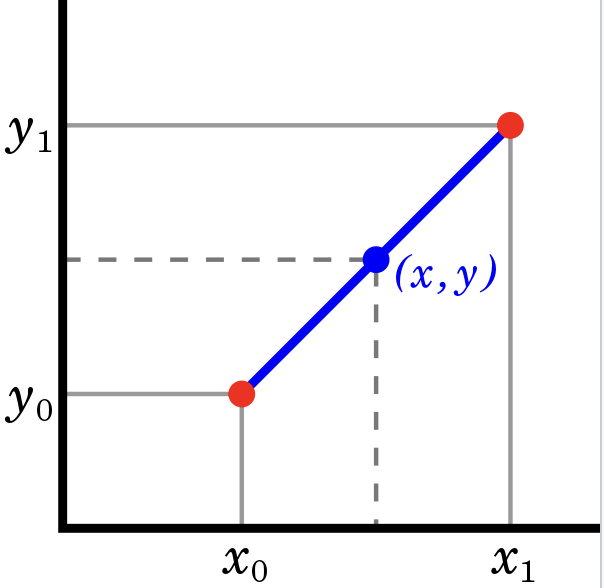

In [117]:
dt_xy2['target'].describe()

count    1.118822e+06
mean     5.799153e+04
std      4.642602e+04
min      3.500000e+02
25%      3.050000e+04
50%      4.480000e+04
75%      6.980000e+04
max      1.450000e+06
Name: target, dtype: float64

In [118]:
# 1. Íµ¨ÏôÄ ÎèôÎ≥ÑÎ°ú Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•ÌïòÎäî ÏïÑÌååÌä∏Î™ÖÏùÑ Ï∞æÏäµÎãàÎã§
most_frequent_apt = dt_xy2.groupby(['Îèô', 'Ï¢åÌëúX_1', 'Ï¢åÌëúY_1'])['ÏïÑÌååÌä∏Î™Ö'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

# 2. Í≤∞Ï∏°ÏπòÎ•º Ï±ÑÏõÅÎãàÎã§
for idx, row in most_frequent_apt.iterrows():
    if row['ÏïÑÌååÌä∏Î™Ö'] is not None:
        mask = (dt_xy2['Îèô'] == row['Îèô']) & \
            (dt_xy2['Ï¢åÌëúX_1'] == row['Ï¢åÌëúX_1']) & \
            (dt_xy2['Ï¢åÌëúY_1'] == row['Ï¢åÌëúY_1']) & \
            (dt_xy2['ÏïÑÌååÌä∏Î™Ö'].isna())
        dt_xy2.loc[mask, 'ÏïÑÌååÌä∏Î™Ö'] = row['ÏïÑÌååÌä∏Î™Ö']

# 3. Í≤∞Í≥º ÌôïÏù∏
print("Ï≤òÎ¶¨ Ï†Ñ ÏïÑÌååÌä∏Î™Ö Í≤∞Ï∏°Ïπò:", dt_xy2['ÏïÑÌååÌä∏Î™Ö'].isnull().sum())
print("\nÎèô, Î≥∏Î≤à, Î∂ÄÎ≤àÎ≥Ñ ÎåÄÌëú ÏïÑÌååÌä∏Î™Ö ÏòàÏãú:")
print(most_frequent_apt.head())

Ï≤òÎ¶¨ Ï†Ñ ÏïÑÌååÌä∏Î™Ö Í≤∞Ï∏°Ïπò: 6

Îèô, Î≥∏Î≤à, Î∂ÄÎ≤àÎ≥Ñ ÎåÄÌëú ÏïÑÌååÌä∏Î™Ö ÏòàÏãú:
     Îèô       Ï¢åÌëúX_1      Ï¢åÌëúY_1     ÏïÑÌååÌä∏Î™Ö
0  Í∞ÄÎùΩÎèô  127.063356  37.501358     Í∞ÄÎùΩÏåçÏö©
1  Í∞ÄÎùΩÎèô  127.102497  37.497610    Ìó¨Î¶¨Ïò§ÏãúÌã∞
2  Í∞ÄÎùΩÎèô  127.116371  37.496358     Í∞ÄÎùΩÍ∏àÌò∏
3  Í∞ÄÎùΩÎèô  127.121931  37.494825  ÌïúÌôîÏò§Î≤®Î¶¨Ïä§ÌÅ¨
4  Í∞ÄÎùΩÎèô  127.128597  37.493800     Í∞ÄÎùΩÎØ∏Î•≠


#### Ï§ëÍ∞Ñ Ï†êÍ≤Ä

In [131]:
dt_xy3 = dt_xy2.copy()

In [314]:
dt_xy3[dt_xy3['is_test']==1].isnull().sum()

Î≤àÏßÄ               2
Î≥∏Î≤à               0
Î∂ÄÎ≤à               0
ÏïÑÌååÌä∏Î™Ö             0
Ï†ÑÏö©Î©¥Ï†Å             0
Ï∏µ                0
Í±¥Ï∂ïÎÖÑÎèÑ             0
ÎèÑÎ°úÎ™Ö              0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê           0
Í±∞ÎûòÏú†Ìòï             0
Îã®ÏßÄÎ∂ÑÎ•ò             0
ÏÑ∏ÎåÄÌÉÄÏûÖ             0
Í¥ÄÎ¶¨Î∞©Ïãù             0
Î≥µÎèÑÏú†Ìòï             0
ÎÇúÎ∞©Î∞©Ïãù             0
Ï†ÑÏ≤¥ÎèôÏàò             0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò            0
Í±¥ÏÑ§ÏÇ¨              0
ÏãúÌñâÏÇ¨              0
Ïó∞Î©¥Ï†Å           6562
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å        6562
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å       6562
Ï†ÑÏö©Î©¥Ï†Å60        6562
Ï†ÑÏö©Î©¥Ï†Å60_85     6562
Ï†ÑÏö©Î©¥Ï†Å85_135    6562
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏      7453
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú        238
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï       274
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú        238
Í±¥Ï∂ïÎ©¥Ï†Å          6565
Ï£ºÏ∞®ÎåÄÏàò          6340
Í∏∞ÏùòÏûÑÏûÑ           231
Îã®ÏßÄÏäπÏù∏Ïùº         6568
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä        6562
Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú         191
Îã®ÏßÄÏã†Ï≤≠Ïùº         656

In [286]:
dt_xy3.isnull().sum()

Î≤àÏßÄ               227
Î≥∏Î≤à                75
Î∂ÄÎ≤à                75
ÏïÑÌååÌä∏Î™Ö               0
Ï†ÑÏö©Î©¥Ï†Å               0
Ï∏µ                  0
Í±¥Ï∂ïÎÖÑÎèÑ               0
ÎèÑÎ°úÎ™Ö                0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê             0
Í±∞ÎûòÏú†Ìòï               0
Îã®ÏßÄÎ∂ÑÎ•ò              73
ÏÑ∏ÎåÄÌÉÄÏûÖ               0
Í¥ÄÎ¶¨Î∞©Ïãù             123
Î≥µÎèÑÏú†Ìòï             632
ÎÇúÎ∞©Î∞©Ïãù             305
Ï†ÑÏ≤¥ÎèôÏàò               0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò              0
Í±¥ÏÑ§ÏÇ¨              140
ÏãúÌñâÏÇ¨              140
Ïó∞Î©¥Ï†Å           876125
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å        876170
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å       876125
Ï†ÑÏö©Î©¥Ï†Å60        876170
Ï†ÑÏö©Î©¥Ï†Å60_85     876170
Ï†ÑÏö©Î©¥Ï†Å85_135    876170
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏      920757
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú        32972
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï       41248
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú        33162
Í±¥Ï∂ïÎ©¥Ï†Å          876279
Ï£ºÏ∞®ÎåÄÏàò          837515
Í∏∞ÏùòÏûÑÏûÑ           31607
Îã®ÏßÄÏäπÏù∏Ïùº         876854
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä     

In [313]:
mode_values = dt_xy3.groupby(['Îèô'])['Í±¥ÏÑ§ÏÇ¨'].transform(
    lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else np.nan)

dt_xy3['Í±¥ÏÑ§ÏÇ¨'] = dt_xy3['ÏãúÌñâÏÇ¨'].fillna(mode_values)

In [287]:
dt_xy3['Ï†ÑÏ≤¥ÎèôÏàò'].value_counts()

10.0     676889
28.0      90465
2.0       55904
1.0       53811
3.0       36049
8.0       22816
4.0       22810
6.0       16381
5.0       15499
15.0      14132
9.0       12230
7.0       11874
12.0      11210
14.0       9892
11.0       8204
13.0       7089
19.0       6635
16.0       4709
22.0       4249
31.0       4009
32.0       3878
23.0       3248
44.0       3117
72.0       3068
124.0      2816
30.0       2627
56.0       2605
20.0       2486
33.0       2385
34.0       2208
17.0       1708
24.0       1705
18.0       1617
51.0       1513
40.0       1504
21.0       1382
50.0       1370
37.0       1028
26.0        827
978.0       591
84.0        549
41.0        514
114.0       132
144.0        90
127.0        83
83.0         73
74.0         61
137.0        52
Name: Ï†ÑÏ≤¥ÎèôÏàò, dtype: int64

In [288]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in dt_xy3.columns:
    if pd.api.types.is_numeric_dtype(dt_xy3[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Ï†ÑÏö©Î©¥Ï†Å', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†Å60', 'Ï†ÑÏö©Î©¥Ï†Å60_85', 'Ï†ÑÏö©Î©¥Ï†Å85_135', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'target', 'is_test', 'Ï¢åÌëúX_1', 'Ï¢åÌëúY_1']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'ÏÑ∏ÎåÄÌÉÄÏûÖ', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÏùòÏûÑÏûÑ', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Ï£ºÏÜå_1', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']


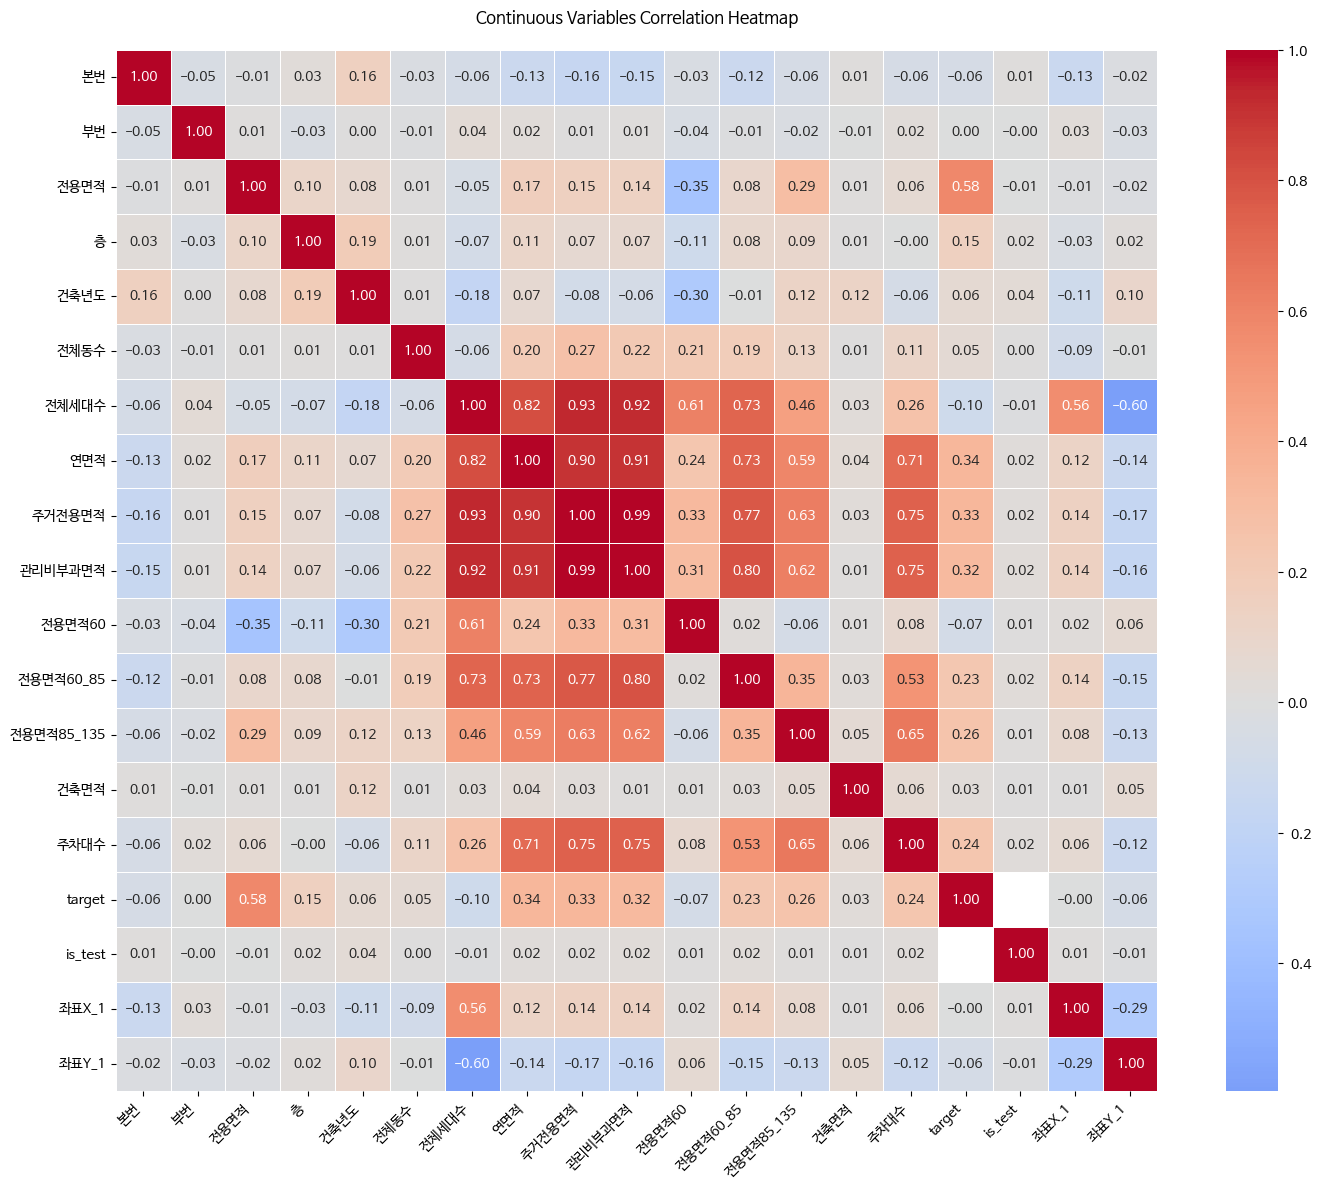

In [369]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
correlation_matrix = dt_xy3[continuous_columns].corr()

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú figure ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(15, 12))

# heatmap ÏÉùÏÑ±
sns.heatmap(correlation_matrix, 
            annot=True,              # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞í ÌëúÏãú
            cmap='coolwarm',         # ÏÉâÏÉÅ Îßµ ÏÑ§Ï†ï
            center=0,                # 0ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉâÏÉÅ ÎåÄÎπÑ
            fmt='.2f',              # ÏÜåÏàòÏ†ê 2ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú
            square=True,            # Ï†ïÏÇ¨Í∞ÅÌòï ÌòïÌÉúÎ°ú ÌëúÏãú
            linewidths=0.5)         # Í≤©Ïûê ÏÑ† ÎëêÍªò

# Ï†úÎ™© ÏÑ§Ï†ï
plt.title('Continuous Variables Correlation Heatmap', pad=20)

# xÏ∂ï Î†àÏù¥Î∏î ÌöåÏ†Ñ
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()

plt.show()

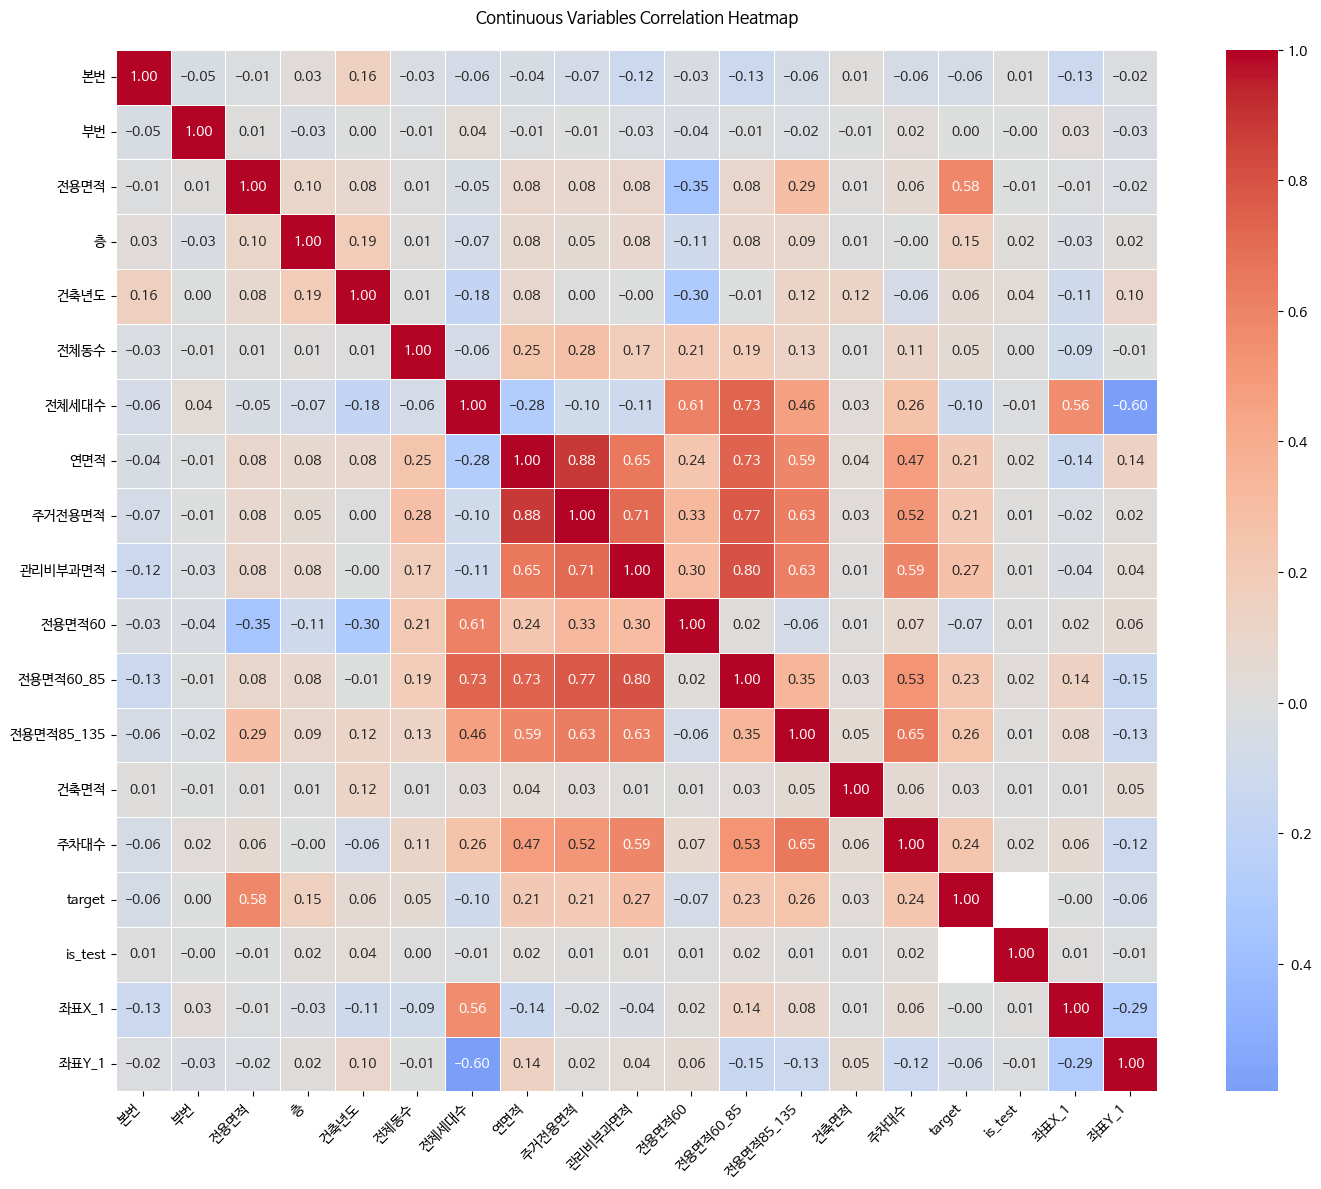

In [370]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§Ïùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
correlation_matrix = dt_xy4[continuous_columns].corr()

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú figure ÌÅ¨Í∏∞ ÏÑ§Ï†ï
plt.figure(figsize=(15, 12))

# heatmap ÏÉùÏÑ±
sns.heatmap(correlation_matrix, 
            annot=True,              # ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞í ÌëúÏãú
            cmap='coolwarm',         # ÏÉâÏÉÅ Îßµ ÏÑ§Ï†ï
            center=0,                # 0ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÏÉâÏÉÅ ÎåÄÎπÑ
            fmt='.2f',              # ÏÜåÏàòÏ†ê 2ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú
            square=True,            # Ï†ïÏÇ¨Í∞ÅÌòï ÌòïÌÉúÎ°ú ÌëúÏãú
            linewidths=0.5)         # Í≤©Ïûê ÏÑ† ÎëêÍªò

# Ï†úÎ™© ÏÑ§Ï†ï
plt.title('Continuous Variables Correlation Heatmap', pad=20)

# xÏ∂ï Î†àÏù¥Î∏î ÌöåÏ†Ñ
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()

plt.show()

In [291]:
print("Ï†úÍ±∞ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", dt_xy3.shape)

Ï†úÍ±∞ Ï†Ñ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1128094, 45)


In [321]:
del_col = ['Îã®ÏßÄÎ∂ÑÎ•ò', 'Î≥µÎèÑÏú†Ìòï', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'ÎÇúÎ∞©Î∞©Ïãù', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨']

# Ï¥àÍ∏∞Í∞í ÏÑ§Ï†ï
dt_xy4 = dt_xy3.copy()

# Í∞Å Ïª¨ÎüºÎ≥ÑÎ°ú ÏàúÏ∞®Ï†ÅÏúºÎ°ú Í≤∞Ï∏°Ïπò Ï†úÍ±∞
for col in del_col:
    dt_xy4 = dt_xy4[~((dt_xy4['is_test']==0) & (dt_xy4[col].isna()))]
    print(f"{col} Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", dt_xy4.shape)

# ÏµúÏ¢Ö Í≤∞Ï∏°Ïπò ÌôïÏù∏
print("\nÏµúÏ¢Ö Í≤∞Ï∏°Ïπò ÌòÑÌô©:")
print(dt_xy4.isnull().sum())

Îã®ÏßÄÎ∂ÑÎ•ò Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1128021, 45)
Î≥µÎèÑÏú†Ìòï Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1127694, 45)
Í¥ÄÎ¶¨Î∞©Ïãù Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1127694, 45)
ÎÇúÎ∞©Î∞©Ïãù Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1127694, 45)
Í±¥ÏÑ§ÏÇ¨ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1127694, 45)
ÏãúÌñâÏÇ¨ Í≤∞Ï∏°Ïπò Ï†úÍ±∞ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1127694, 45)

ÏµúÏ¢Ö Í≤∞Ï∏°Ïπò ÌòÑÌô©:
Î≤àÏßÄ               227
Î≥∏Î≤à                75
Î∂ÄÎ≤à                75
ÏïÑÌååÌä∏Î™Ö               0
Ï†ÑÏö©Î©¥Ï†Å               0
Ï∏µ                  0
Í±¥Ï∂ïÎÖÑÎèÑ               0
ÎèÑÎ°úÎ™Ö                0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê             0
Í±∞ÎûòÏú†Ìòï               0
Îã®ÏßÄÎ∂ÑÎ•ò               0
ÏÑ∏ÎåÄÌÉÄÏûÖ               0
Í¥ÄÎ¶¨Î∞©Ïãù               0
Î≥µÎèÑÏú†Ìòï               0
ÎÇúÎ∞©Î∞©Ïãù               0
Ï†ÑÏ≤¥ÎèôÏàò               0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò              0
Í±¥ÏÑ§ÏÇ¨                0
ÏãúÌñâÏÇ¨                0
Ïó∞Î©¥Ï†Å           876125
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å      

In [319]:
dt_xy4['Ï†ÑÏö©Î©¥Ï†Å'].describe()

count    1.127694e+06
mean     7.715111e+01
std      2.936287e+01
min      1.002000e+01
25%      5.965000e+01
50%      8.184000e+01
75%      8.496000e+01
max      4.243200e+02
Name: Ï†ÑÏö©Î©¥Ï†Å, dtype: float64

In [331]:
print(dt_xy4.isnull().sum())

Î≤àÏßÄ               227
Î≥∏Î≤à                75
Î∂ÄÎ≤à                75
ÏïÑÌååÌä∏Î™Ö               0
Ï†ÑÏö©Î©¥Ï†Å               0
Ï∏µ                  0
Í±¥Ï∂ïÎÖÑÎèÑ               0
ÎèÑÎ°úÎ™Ö                0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê             0
Í±∞ÎûòÏú†Ìòï               0
Îã®ÏßÄÎ∂ÑÎ•ò               0
ÏÑ∏ÎåÄÌÉÄÏûÖ               0
Í¥ÄÎ¶¨Î∞©Ïãù               0
Î≥µÎèÑÏú†Ìòï               0
ÎÇúÎ∞©Î∞©Ïãù               0
Ï†ÑÏ≤¥ÎèôÏàò               0
Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò              0
Í±¥ÏÑ§ÏÇ¨                0
ÏãúÌñâÏÇ¨                0
Ïó∞Î©¥Ï†Å           844432
Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å        876170
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å       876125
Ï†ÑÏö©Î©¥Ï†Å60        876170
Ï†ÑÏö©Î©¥Ï†Å60_85     876170
Ï†ÑÏö©Î©¥Ï†Å85_135    876170
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏      920684
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú        32972
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï       41248
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú        33162
Í±¥Ï∂ïÎ©¥Ï†Å          876279
Ï£ºÏ∞®ÎåÄÏàò          837515
Í∏∞ÏùòÏûÑÏûÑ           31607
Îã®ÏßÄÏäπÏù∏Ïùº         876854
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä     

In [368]:
# Ïó∞Î©¥Ï†Å Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ Ï∂îÏ∂ú
null_rows = dt_xy4[dt_xy4['Ïó∞Î©¥Ï†Å'].isna()]

# Í∏∞Î≥∏ Ï†ïÎ≥¥ Ï∂úÎ†•
print("Ïó∞Î©¥Ï†Å Í≤∞Ï∏°Ïπò Í∞úÏàò:", len(null_rows))
print("\nÍ≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨:")
print(null_rows['is_test'].value_counts())

# Ï£ºÏöî Ïª¨ÎüºÎì§Îßå ÏÑ†ÌÉùÌïòÏó¨ Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
important_cols = ['ÏïÑÌååÌä∏Î™Ö', 'Îèô', 'Íµ¨', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 
                 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'Ï¢åÌëúX_1', 'Ï¢åÌëúY_1']

print("\nÍ≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:")
display(null_rows[important_cols].iloc[22000:22100])

# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÎì§Ïùò Îã§Î•∏ Ïª¨Îüº Í≤∞Ï∏°Ïπò ÌòÑÌô©
print("\nÌï¥Îãπ ÌñâÎì§Ïùò Ï†ÑÏ≤¥ Ïª¨Îüº Í≤∞Ï∏°Ïπò ÌòÑÌô©:")
print(null_rows.isnull().sum().sort_values(ascending=False))

# Ïó∞Î©¥Ï†Å Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÏïÑÌååÌä∏Îì§Ïùò Î∂ÑÌè¨
print("\nÏó∞Î©¥Ï†Å Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÏïÑÌååÌä∏ ÎπàÎèÑ:")
print(null_rows['ÏïÑÌååÌä∏Î™Ö'].value_counts().head())

Ïó∞Î©¥Ï†Å Í≤∞Ï∏°Ïπò Í∞úÏàò: 0

Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨:
Series([], Name: is_test, dtype: int64)

Í≤∞Ï∏°Ïπò Îç∞Ïù¥ÌÑ∞ ÏÉòÌîå:


Empty DataFrame
Columns: [ÏïÑÌååÌä∏Î™Ö, Îèô, Íµ¨, Í±¥Ï∂ïÎÖÑÎèÑ, Ï†ÑÏ≤¥ÎèôÏàò, Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò, Ïó∞Î©¥Ï†Å, Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å, Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å, Ï¢åÌëúX_1, Ï¢åÌëúY_1]
Index: []


Ìï¥Îãπ ÌñâÎì§Ïùò Ï†ÑÏ≤¥ Ïª¨Îüº Í≤∞Ï∏°Ïπò ÌòÑÌô©:
Î≤àÏßÄ            0.0
Ï†ÑÏö©Î©¥Ï†Å60_85     0.0
Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏      0.0
Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú       0.0
ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï      0.0
Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú       0.0
Í±¥Ï∂ïÎ©¥Ï†Å          0.0
Ï£ºÏ∞®ÎåÄÏàò          0.0
Í∏∞ÏùòÏûÑÏûÑ          0.0
Îã®ÏßÄÏäπÏù∏Ïùº         0.0
ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä        0.0
Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú        0.0
Îã®ÏßÄÏã†Ï≤≠Ïùº         0.0
target        0.0
is_test       0.0
Ï¢åÌëúX_1         0.0
Ï¢åÌëúY_1         0.0
Ï£ºÏÜå_1          0.0
Íµ¨             0.0
Îèô             0.0
Í≥ÑÏïΩÎÖÑ           0.0
Ï†ÑÏö©Î©¥Ï†Å85_135    0.0
Ï†ÑÏö©Î©¥Ï†Å60        0.0
Î≥∏Î≤à            0.0
Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å       0.0
Î∂ÄÎ≤à            0.0
ÏïÑÌååÌä∏Î™Ö          0.0
Ï†ÑÏö©Î©¥Ï†Å          0.0
Ï∏µ             0.0
Í±¥Ï∂ïÎÖÑÎèÑ          0.0
ÎèÑÎ°úÎ™Ö           0.0
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê        0.0
Í±∞ÎûòÏú†Ìòï          0.0
Îã®ÏßÄÎ∂ÑÎ•ò          0.0
ÏÑ∏ÎåÄÌÉÄÏûÖ          0.0
Í¥ÄÎ¶¨Î∞©Ïãù          0.0
Î≥µÎèÑÏú†Ìòï          0.0


In [355]:
# 1. ÏïÑÌååÌä∏Î™ÖÍ≥º Í±¥Ï∂ïÎÖÑÎèÑÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ Ïó∞Î©¥Ï†ÅÏùò ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
group_mean = dt_xy4.groupby(['ÏïÑÌååÌä∏Î™Ö', 'Îèô', 'Íµ¨'])['Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å'].transform('mean')

# 2. Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞ (ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ï†ÅÏö©)
dt_xy4['Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å'] = dt_xy4['Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å'].fillna(group_mean)  # Í∞ôÏùÄ ÏïÑÌååÌä∏, Í∞ôÏùÄ Í±¥Ï∂ïÎÖÑÎèÑÏùò ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõÄ

# # 3. Ïó¨Ï†ÑÌûà ÎÇ®ÏïÑÏûàÎäî Í≤∞Ï∏°ÏπòÎäî Í±¥Ï∂ïÎÖÑÎèÑÎ≥Ñ ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõÄ
# year_mean = dt_xy4.groupby('Í±¥Ï∂ïÎÖÑÎèÑ')['Ïó∞Î©¥Ï†Å'].transform('mean')
# dt_xy4['Ïó∞Î©¥Ï†Å'] = dt_xy4['Ïó∞Î©¥Ï†Å'].fillna(year_mean)

# # 4. ÎßàÏßÄÎßâÏúºÎ°ú ÎÇ®ÏùÄ Í≤∞Ï∏°ÏπòÎäî Ï†ÑÏ≤¥ ÌèâÍ∑†ÏúºÎ°ú Ï±ÑÏõÄ
# total_mean = dt_xy4['Ïó∞Î©¥Ï†Å'].mean()
# dt_xy4['Ïó∞Î©¥Ï†Å'] = dt_xy4['Ïó∞Î©¥Ï†Å'].fillna(total_mean)

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÌõÑ ÌôïÏù∏
print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£å Ïó¨Î∂Ä:", dt_xy4['Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å'].isnull().sum())

Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÏôÑÎ£å Ïó¨Î∂Ä: 842187


In [366]:
# 1. Í∞ÄÏû• Íµ¨Ï≤¥Ï†ÅÏù∏ Í∑∏Î£πÎ∂ÄÌÑ∞ ÏãúÏûëÌïòÏó¨ Ï†êÏ∞® ÏùºÎ∞òÏ†ÅÏù∏ Í∑∏Î£πÏúºÎ°ú ÌôïÏû•
def fill_missing_hierarchical(df, target_col):
    df_copy = df.copy()
    
    # 1Îã®Í≥Ñ: ÎèôÏùº ÏïÑÌååÌä∏, Îèô, Íµ¨Ïùò ÌèâÍ∑†
    group_mean_1 = df_copy.groupby(['ÏïÑÌååÌä∏Î™Ö', 'Îèô', 'Íµ¨'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_1)
    
    # 1Îã®Í≥Ñ: ÎèôÏùº ÏïÑÌååÌä∏, Îèô, Íµ¨Ïùò ÌèâÍ∑†
    group_mean_2 = df_copy.groupby(['ÏïÑÌååÌä∏Î™Ö', 'Ï¢åÌëúX_1', 'Ï¢åÌëúY_1'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_2)

    # # 1Îã®Í≥Ñ: ÎèôÏùº ÏïÑÌååÌä∏, Îèô, Íµ¨Ïùò ÌèâÍ∑†
    # group_mean_3 = df_copy.groupby(['Îèô', 'Ï¢åÌëúX_1', 'Ï¢åÌëúY_1'])[target_col].transform('mean')
    # df_copy[target_col] = df_copy[target_col].fillna(group_mean_3)

    # 1Îã®Í≥Ñ: ÎèôÏùº ÏïÑÌååÌä∏, Îèô, Íµ¨Ïùò ÌèâÍ∑†
    group_mean_4 = df_copy.groupby(['ÏïÑÌååÌä∏Î™Ö', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_4)

    # 1Îã®Í≥Ñ: ÎèôÏùº ÏïÑÌååÌä∏, Îèô, Íµ¨Ïùò ÌèâÍ∑†
    group_mean_5 = df_copy.groupby(['Îèô', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_5)

    # # 2Îã®Í≥Ñ: ÎèôÏùº Îèô, Íµ¨Ïùò ÌèâÍ∑†
    # group_mean_6 = df_copy.groupby(['Ï¢åÌëúX_1', 'Ï¢åÌëúY_1', 'ÏïÑÌååÌä∏Î™Ö'])[target_col].transform('mean')
    # df_copy[target_col] = df_copy[target_col].fillna(group_mean_6)
    
    # 2Îã®Í≥Ñ: ÎèôÏùº Îèô, Íµ¨Ïùò ÌèâÍ∑†
    group_mean_7 = df_copy.groupby(['Ï¢åÌëúX_1', 'Ï¢åÌëúY_1', 'Ï†ÑÏ≤¥ÎèôÏàò'])[target_col].transform('mean')
    df_copy[target_col] = df_copy[target_col].fillna(group_mean_7)
    
    # # 4Îã®Í≥Ñ: Ï†ÑÏ≤¥ ÌèâÍ∑†
    # total_mean = df_copy[target_col].mean()
    # df_copy[target_col] = df_copy[target_col].fillna(total_mean)
    
    return df_copy[target_col]


# Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
dt_xy4['Ïó∞Î©¥Ï†Å'] = fill_missing_hierarchical(dt_xy4, 'Ïó∞Î©¥Ï†Å')

# Í≤∞Í≥º ÌôïÏù∏
print("Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÌõÑ Îã®Í≥ÑÎ≥Ñ ÌôïÏù∏:")
print(f"ÏµúÏ¢Ö Í≤∞Ï∏°Ïπò Ïàò: {dt_xy4['Ïó∞Î©¥Ï†Å'].isnull().sum()}")

# Ï≤òÎ¶¨Îêú Í∞íÎì§Ïùò ÌÜµÍ≥Ñ ÌôïÏù∏
print("\nÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:")
print(dt_xy4['Ïó∞Î©¥Ï†Å'].describe())

Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ï†ÑÌõÑ Îã®Í≥ÑÎ≥Ñ ÌôïÏù∏:
ÏµúÏ¢Ö Í≤∞Ï∏°Ïπò Ïàò: 0

Ï≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ ÌÜµÍ≥Ñ:
count    1.127694e+06
mean     8.826413e+04
std      9.754436e+04
min      0.000000e+00
25%      6.444504e+04
50%      6.444504e+04
75%      6.793000e+04
max      9.591851e+06
Name: Ïó∞Î©¥Ï†Å, dtype: float64


In [46]:
concat_2['target_log'] = np.log1p(concat_2['target'])

In [48]:
concat_2['target_log'].describe()

count    1.118822e+06
mean     1.075095e+01
std      6.374883e-01
min      5.860786e+00
25%      1.032551e+01
50%      1.070999e+01
75%      1.115340e+01
max      1.418707e+01
Name: target_log, dtype: float64

In [49]:
sample_size = len(concat_2) // 4 # 25%Îßå ÏÇ¨Ïö©
sampled_data = concat_2.sample(n=sample_size, random_state=1234)

In [50]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in sampled_data.columns:
    if pd.api.types.is_numeric_dtype(sampled_data[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Ï†ÑÏö©Î©¥Ï†Å', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†Å60', 'Ï†ÑÏö©Î©¥Ï†Å60_85', 'Ï†ÑÏö©Î©¥Ï†Å85_135', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'target_log']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'ÏÑ∏ÎåÄÌÉÄÏûÖ', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÏùòÏûÑÏûÑ', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']


In [51]:
sampled_data['Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú'].value_counts()

N    62122
Y     1031
Name: Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú, dtype: int64

In [ ]:
## mapping Í∞ÄÎä•Ìïú Î≥ÄÏàò Ï†ïÎ¶¨
# Í±∞ÎûòÏú†Ìòï "Ï§ëÍ∞úÍ±∞Îûò":0, "ÏßÅÍ±∞Îûò":0
# Îã®ÏßÄÎ∂ÑÎ•ò "ÏïÑÌååÌä∏":0, "ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(ÏïÑÌååÌä∏)":0,  Ï£ºÏÉÅÎ≥µÌï©:1, "ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(Ï£ºÏÉÅÎ≥µÌï©)":1, Ïó∞Î¶ΩÏ£ºÌÉù:2
# ÏÑ∏ÎåÄÌÉÄÏûÖ  Î∂ÑÏñë  Í∏∞ÌÉÄ  ÏûÑÎåÄ
# Í¥ÄÎ¶¨Î∞©Ïãù  ÏúÑÌÉÅÍ¥ÄÎ¶¨, ÏûêÏπòÍ¥ÄÎ¶¨, ÏßÅÏòÅ
# Î≥µÎèÑÏú†Ìòï  Í≥ÑÎã®Ïãù, ÌòºÌï©Ïãù, Î≥µÎèÑÏãù, ÌÉÄÏõåÌòï, Í∏∞ÌÉÄ
# ÎÇúÎ∞©Î∞©Ïãù  Í∞úÎ≥ÑÎÇúÎ∞©, ÏßÄÏó≠ÎÇúÎ∞©, Ï§ëÏïôÎÇúÎ∞©, Í∏∞ÌÉÄ
# Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  ÏúÑÌÉÅ, ÏßÅÏòÅ, ÏúÑÌÉÅ+ÏßÅÏòÅ, Í∏∞ÌÉÄ 
# ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï  Ï¢ÖÌï©Í≥ÑÏïΩ, Îã®ÏùºÍ≥ÑÏïΩ
# Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú  ÏúÑÌÉÅ, ÏßÅÏòÅ, ÏúÑÌÉÅ+ÏßÅÏòÅ, Í∏∞ÌÉÄ 
# Í∏∞ÏùòÏûÑÏûÑ  ÏùòÎ¨¥, Í∏∞ÌÉÄ, ÏûÑÏùò, ÏûÑÎåÄ
# ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä: Y
# Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú: N Y





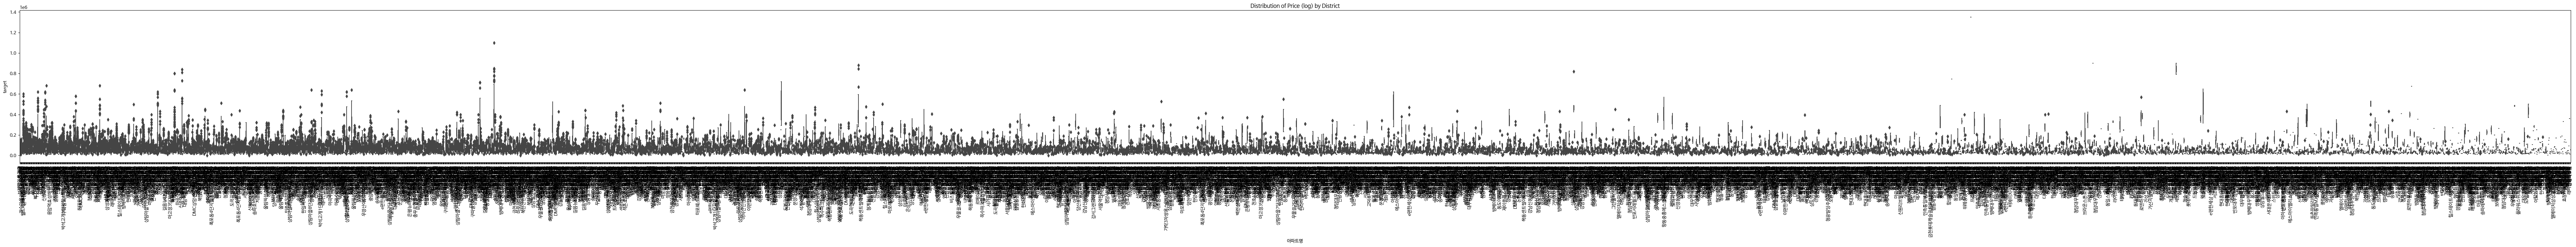

In [26]:
# [Îèô]: Î∞òÌè¨Îèô, ÌïúÎÇ®Îèô,  ÏïïÍµ¨Ï†ïÎèô, Ï≤≠Îã¥Îèô, ÎèÑÍ≥°Îèô, ÏÑ±ÏàòÎèô1Í∞Ä, ÏÇºÏÑ±Îèô, Ïû†Ïã§Îèô, ÎåÄÏπòÎèô
# [Íµ¨]: Ïö©ÏÇ∞Íµ¨, ÏÑúÏ¥àÍµ¨, Í∞ïÎÇ®Íµ¨, ÏÜ°ÌååÍµ¨
# [Îã®ÏßÄÎ∂ÑÎ•ò]: ÏïÑÌååÌä∏, Ï£ºÏÉÅÎ≥µÌï©
# [ÏÑ∏ÎåÄÌÉÄÏûÖ]: Î∂ÑÏñë, Í∏∞ÌÉÄ
# [Î≥µÎèÑÏú†Ìòï]: Í≥ÑÎã®Ïãù, ÌòºÌï©Ïãù, ÌÉÄÏõåÌòï
# [ÎÇúÎ∞©Î∞©Ïãù]: Í∞úÎ≥ÑÎÇúÎ∞©, ÏßÄÏó≠ÎÇúÎ∞©
# [Í±¥ÏÑ§ÏÇ¨]: ÏÇºÏÑ±Î¨ºÏÇ∞, GSÍ±¥ÏÑ§, ÎåÄÎ¶ºÍ±¥ÏÑ§, Í∏àÌò∏Í±¥ÏÑ§, Ï≤≠Îã¥ÏÇºÏùµÏïÑÌååÌä∏, (Ï£º)ÎåÄÎ¶ºÏÇ∞ÏóÖ,  ÎåÄÎ¶ºÏÇ∞ÏóÖ (Ï£º), ÌòÑÎåÄÍ±¥ÏÑ§,ÏÇºÏÑ±Î¨ºÏÇ∞,ÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú, ÌòÑÎåÄ,ÏåçÏö©,GS, ÎëêÏÇ∞Ï§ëÍ≥µÏóÖ,  ÏÇºÏùµÍ±¥ÏÑ§,   Ï§ëÏïôÍ±¥ÏÑ§,    ÏÇºÏÑ±Î¨ºÏÇ∞, ÌòÑÎåÄÏÇ∞ÏóÖÍ∞úÎ∞ú,     ÎåÄÎ¶º,ÏÇºÏÑ±,ÌòÑÎåÄ,ÌòÑÏÇ∞, ÎåÄÎ¶ºÏÇ∞ÏóÖ,   ÏßÄÏóêÏä§Í±¥ÏÑ§(Ï£º)
# [Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú]: Y
# [Í≥ÑÏïΩÎÖÑ]: 2014ÎÖÑÏù¥Ï†Ñ, 14ÎÖÑ~19ÎÖÑ, 20ÎÖÑÏù¥ÌõÑ 


# Î¨¥ÏùòÎØ∏: Í¥ÄÎ¶¨Î∞©Ïãù, Í±∞ÎûòÏú†Ìòï, Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏, Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú, ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï, Í∏∞ÏùòÏûÑÏûÑ, Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú, Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ
plt.figure(figsize=(100, 6))
sns.boxplot(data=sampled_data, x='ÏïÑÌååÌä∏Î™Ö', y='target')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Price (log) by District')
plt.show()


# plt.figure(figsize=(12, 6))
# sns.violinplot(data=sampled_data, x='Í≥ÑÏïΩÏõî', y='target', inner='box')
# plt.xticks(rotation=45)
# plt.title('Price Distribution (log) by District with Box Plot')
# plt.show()

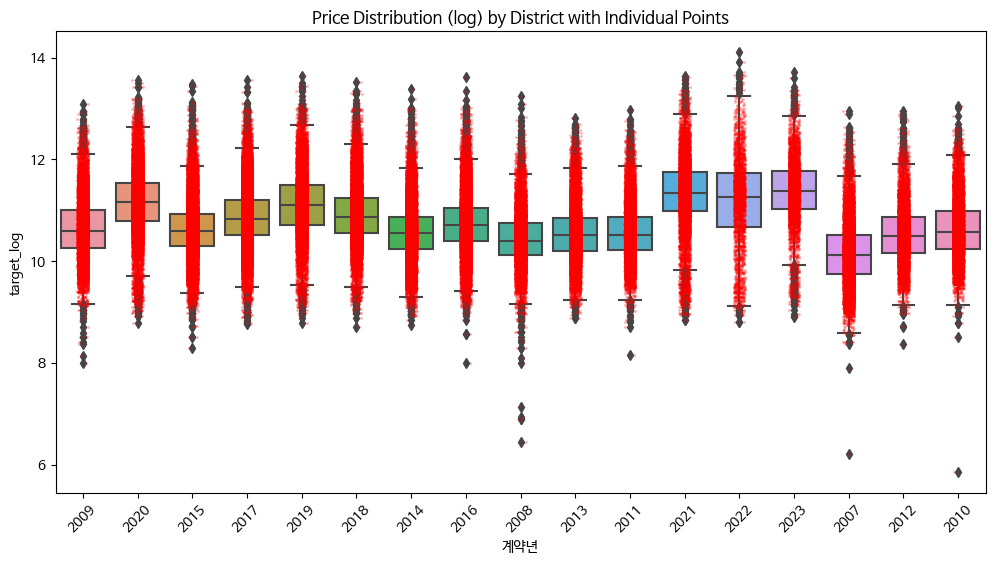

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=sampled_data, x='Í≥ÑÏïΩÎÖÑ', y='target_log', whis=1.5)
sns.stripplot(data=sampled_data, x='Í≥ÑÏïΩÎÖÑ', y='target_log', color='red', alpha=0.3, size=2)
plt.xticks(rotation=45)
plt.title('Price Distribution (log) by District with Individual Points')
plt.show()

In [19]:
print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)


Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº', 'Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ïó∞Î©¥Ï†Å', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†Å60', 'Ï†ÑÏö©Î©¥Ï†Å60_85', 'Ï†ÑÏö©Î©¥Ï†Å85_135', 'Ï†ÑÏö©Î©¥Ï†Å135', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test', 'target_log']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≤àÏßÄ', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê', 'Í±∞ÎûòÏú†Ìòï', 'Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ', 'Îã®ÏßÄÎ∂ÑÎ•ò', 'Ï†ÑÌôîÎ≤àÌò∏', 'Ìå©Ïä§Î≤àÌò∏', 'ÏÑ∏ÎåÄÌÉÄÏûÖ', 'Í¥ÄÎ¶¨Î∞©Ïãù', 'Î≥µÎèÑÏú†Ìòï', 'ÎÇúÎ∞©Î∞©Ïãù', 'Í±¥ÏÑ§ÏÇ¨', 'ÏãúÌñâÏÇ¨', 'ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº_ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'ÌôàÌéòÏù¥ÏßÄ', 'Îì±Î°ùÏùºÏûê', 'ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÏùòÏûÑÏûÑ', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî']


In [20]:
# 5. Feature importanceÎ•º Í∞ÑÎã®Ìûà ÌôïÏù∏ (ÏÑ†ÌòïÌöåÍ∑Ä Í∏∞Ï§Ä)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Ï£ºÏöî ÏàòÏπòÌòï Î≥ÄÏàòÎì§ ÏÑ†ÌÉù
numeric_features = ['Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Ï†ÑÏö©Î©¥Ï†Å', 'Ï∏µ', 'Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò']
X = sampled_data[numeric_features]
y = sampled_data['target_log']

# Ïä§ÏºÄÏùºÎßÅ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_features)

# ÏÑ†Ìòï ÌöåÍ∑ÄÎ°ú feature importance ÌôïÏù∏
model = LinearRegression()
model.fit(X_scaled, y)

# Feature importance ÏãúÍ∞ÅÌôî
importance_df = pd.DataFrame({
    'feature': numeric_features,
    'importance': abs(model.coef_)
})
importance_df = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title('Feature Importance (Based on Linear Regression Coefficients)')
plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [19]:
# 4. ÌÜµÍ≥ÑÏ†Å Î∂ÑÏÑù
from scipy import stats

# Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàòÏôÄ p-value Í≥ÑÏÇ∞
correlation, p_value = stats.pearsonr(sampled_data['Ïó∞Î©¥Ï†Å'], sampled_data['target'])
print(f"Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: nan
P-value: nan


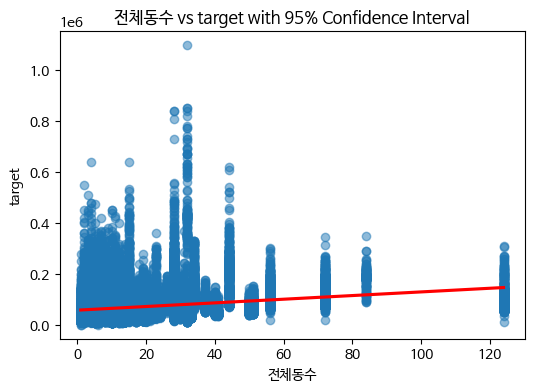

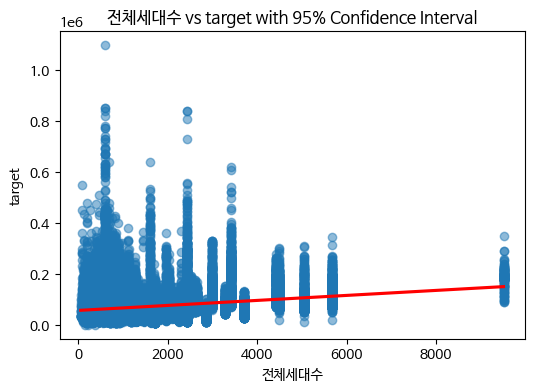

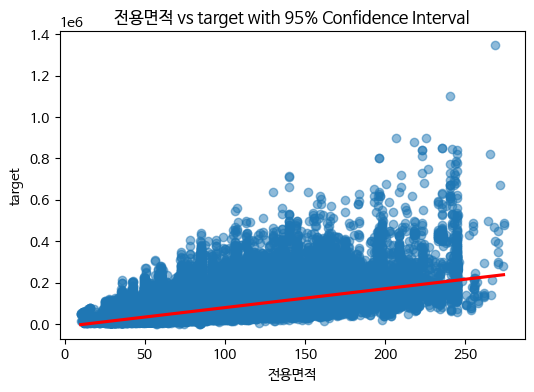

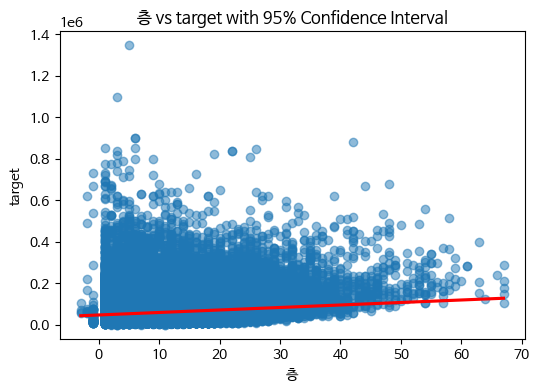

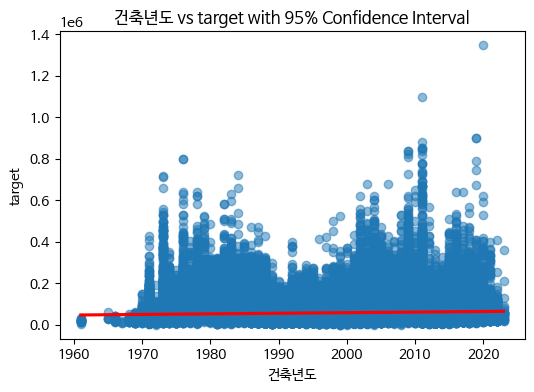

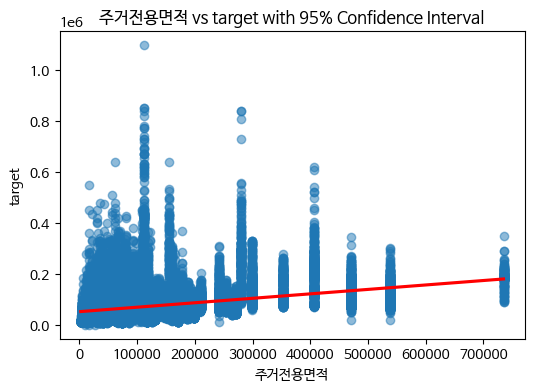

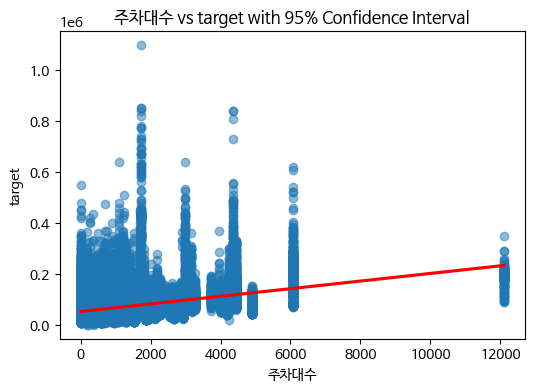

In [42]:
X = ['Ï†ÑÏ≤¥ÎèôÏàò', 'Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'Ï†ÑÏö©Î©¥Ï†Å','Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò']
y = 'target'
for x in X:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=sampled_data,
                x=x,
                y=y,
                scatter_kws={'alpha':0.5},
                line_kws={'color': 'red'},
                ci=95)  # 95% confidence interval
    plt.title(f'{x} vs {y} with 95% Confidence Interval')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

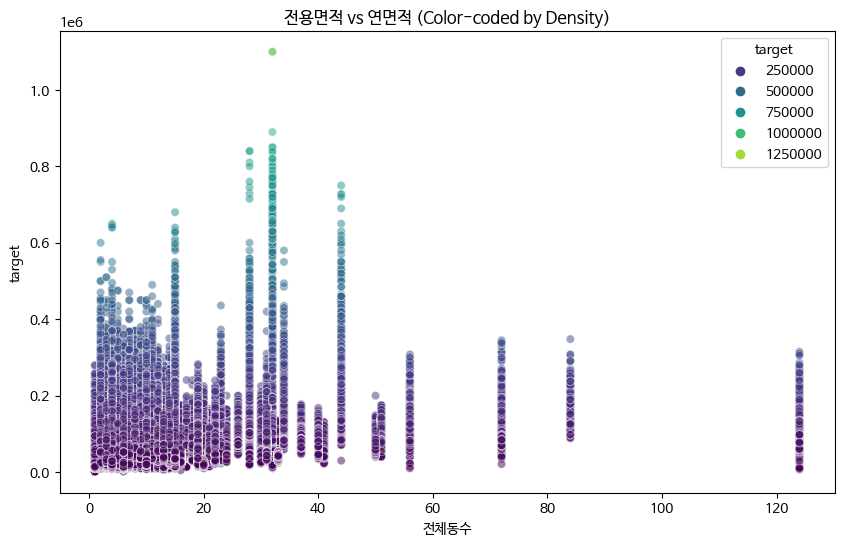

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=concat,
                x='Ï†ÑÏ≤¥ÎèôÏàò',
                y='target',
                alpha=0.5,
                hue='target',  # Color points based on y-value
                palette='viridis')
plt.title('Ï†ÑÏö©Î©¥Ï†Å vs Ïó∞Î©¥Ï†Å (Color-coded by Density)')
plt.xlabel('Ï†ÑÏ≤¥ÎèôÏàò')
plt.ylabel('target')
plt.show()

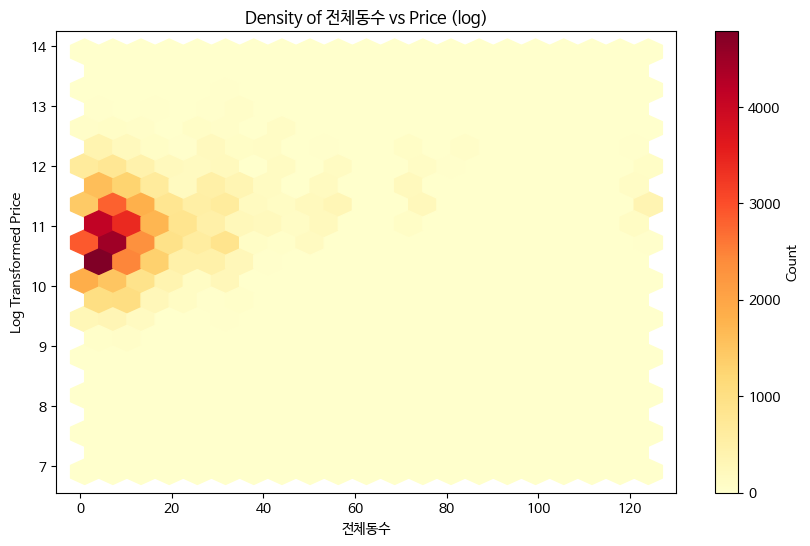

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sampled_data,
            x='Ï†ÑÏö©Î©¥Ï†Å',  # Your numeric feature
            y='target_log',
            cmap='viridis',
            fill=True)
plt.title('Density Plot of Price vs Area')
plt.show()

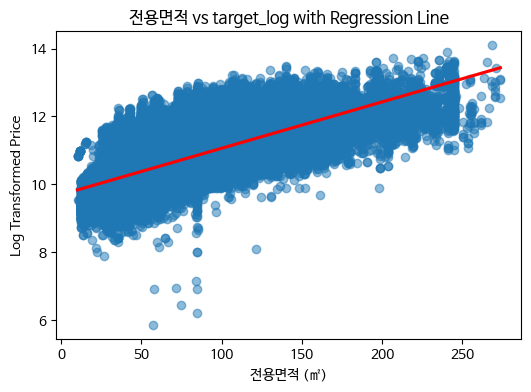

In [15]:
plt.figure(figsize=(6, 4))
sns.regplot(data=sampled_data, 
            x='Ï†ÑÏö©Î©¥Ï†Å', 
            y='target_log',
            scatter_kws={'alpha':0.5},  # Add transparency to points
            line_kws={'color': 'red'})  # Regression line color
plt.title('Ï†ÑÏö©Î©¥Ï†Å vs target_log with Regression Line')
plt.xlabel('Ï†ÑÏö©Î©¥Ï†Å („é°)')
plt.ylabel('Log Transformed Price')
plt.show()

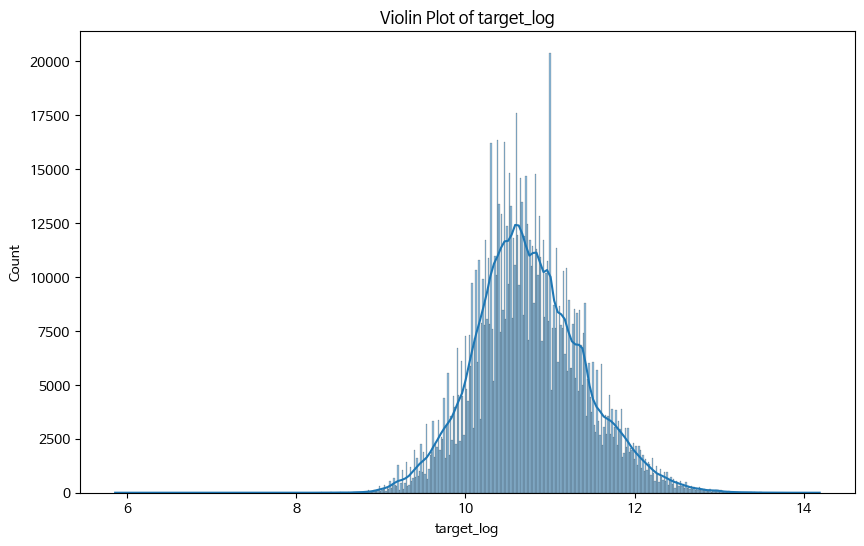

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data=concat, x='target_log', kde=True)
plt.title('Violin Plot of target_log')
plt.show()

In [ ]:
# Ïã§Ï†úÎ°ú Í≤∞Ï∏°ÏπòÎùºÍ≥† ÌëúÏãúÎäî ÏïàÎêòÏñ¥ÏûàÏßÄÎßå ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÎì§Ïù¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
# ÏïÑÎûò 3Í∞ÄÏßÄÏùò Í≤ΩÏö∞ Î™®Îëê ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
display(concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].value_counts())

In [ ]:
display(concat['Í±∞ÎûòÏú†Ìòï'].value_counts())

In [ ]:
display(concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].value_counts())

In [ ]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)

In [ ]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat.isnull().sum()

In [ ]:
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
# NullÍ∞íÏù¥ 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†úÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() <= 1000000]))     # ÎÇ®Í≤®Ïßà Î≥ÄÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() >= 1000000]))

In [ ]:
# ÏúÑÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§Îßå Í≥®Îùº ÏÉàÎ°úÏö¥ concat_select Í∞ùÏ≤¥Î°ú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [ ]:
concat_select.isnull().sum()     # Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú Î™®ÏäµÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# targetÎ≥ÄÏàòÎäî test dataset Í∞úÏàòÎßåÌÅº(9272) Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÑ†ÌòïÎ≥¥Í∞ÑÏùÑ Ìï¥Ï£ºÍ≥†, Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî ÏïåÏàòÏóÜÍ∏∞Ïóê ‚Äúunknown‚ÄùÏù¥ÎùºÍ≥† ÏûÑÏùòÎ°ú Î≥¥Í∞ÑÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select.info()

In [ ]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')

In [ ]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [ ]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [ ]:
concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

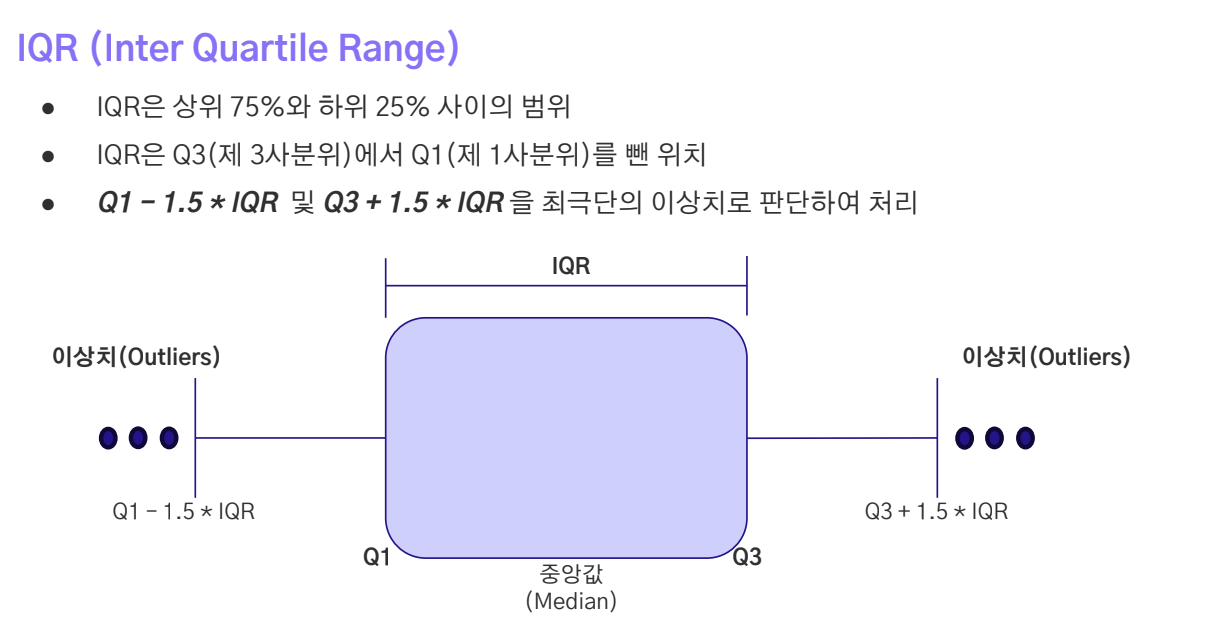

In [ ]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat_select.shape)

In [ ]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = 'Ï†ÑÏö©Î©¥Ï†Å', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [ ]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [ ]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat_select = remove_outliers_iqr(concat_select, 'Ï†ÑÏö©Î©¥Ï†Å')

In [ ]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat_select.shape)

In [ ]:
concat_select['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

## 4. Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select['Íµ¨'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del concat_select['ÏãúÍµ∞Íµ¨']

concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

In [ ]:
concat_select.columns

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
all = list(concat_select['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [ ]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat_select['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat_select['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [ ]:
concat_select.columns

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

In [ ]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2009 else 0)

In [ ]:
concat_select.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

In [ ]:
concat_select.shape

- ÏúÑ Îëê ÏÇ¨Ìï≠ Ïô∏ÏóêÎèÑ Ïô∏Î∂Ä Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÍ±∞ÎÇò, EDAÎ•º ÌÜµÌï¥ Îçî ÎßéÏùÄ Î≥ÄÏàòÎ•º Ï†úÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

## 5. Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

In [ ]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

In [ ]:
dt_test.head(1)

In [ ]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

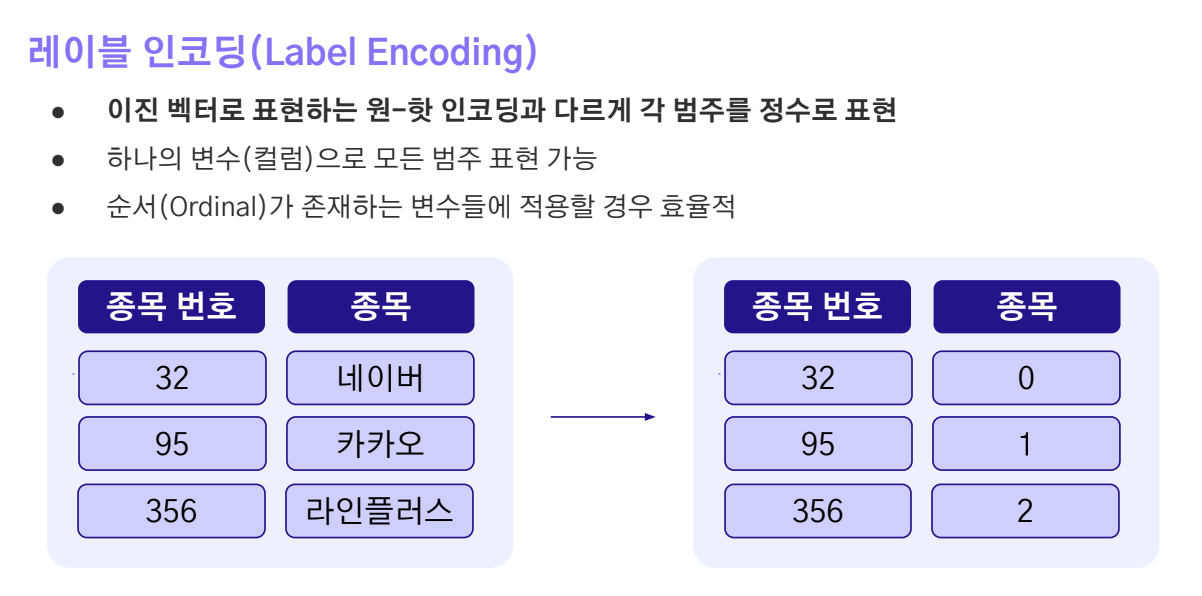

In [ ]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

In [ ]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

In [ ]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ RandomForestÎ•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- TrainÍ≥º Valid datasetÏùÑ Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî `holdout` Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Î∞©Î≤ïÏùò Í≤ΩÏö∞  ÎåÄÎûµÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú baselineÏóêÏÑú ÏÇ¨Ïö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïù¥ ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ edaÎ•º ÌÜµÌï¥ÏÑú ÌèâÍ∞ÄÏÑ∏Ìä∏ÏôÄ Í≤ΩÌñ•ÏùÑ ÎßûÏ∂îÍ±∞ÎÇò kfoldÏôÄ Í∞ôÏùÄ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í≥†Î†§Î•º Ï∂îÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [ ]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [ ]:
# RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≤ÉÎèÑ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [ ]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = "neg_mean_squared_error",        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
X_val['pred'] = pred

In [ ]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [ ]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [ ]:
X_val_sort.head()

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [ ]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [ ]:
display(error_top100.head(1))
display(best_top100.head(1))

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [ ]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

In [ ]:
sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6. Inference

In [ ]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

In [ ]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 7. Output File Save

In [ ]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)